In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import tree                          
import graphviz
import sys
from matplotlib.pyplot import figure
import os

from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

import nltk
from nltk.corpus import stopwords

In [15]:
df = pd.read_csv("GoodReads_100k_books.csv")
df = df.drop(columns=['author','bookformat','img','isbn','isbn13','pages','rating','reviews','title','totalratings','link'])
df.dropna(subset = ["desc"], inplace=True)
df.dropna(subset = ["genre"], inplace=True)
df = df.reset_index(drop=True)

In [16]:
def get_first(a):
    if "," in a:
        commas = a.split(",")
        if commas[0] == "Fiction" or commas[0] == "Nonfiction":
            return commas[1]
        else:
            return commas[0]
    else:
        return a

In [17]:
df["genre"] = [get_first(i) for i in df["genre"]]

xx = list(df.genre) 

for i in range(len(xx)):
    if "Love" in xx[i] or "Romance" in xx[i] or "Harlequin" in xx[i]:
        xx[i] = "Romance"

for i in range(len(xx)):
    if "Sequential Art" in xx[i] or "Graphic Novels Comics" in xx[i] or "Dc Comics" in xx[i] or "Comics" in xx[i] or"Graphic Novels" in xx[i] or "Manga" in xx[i] or "Marvel" in xx[i]:
        xx[i] = "Comics & Graphic Novels"

for i in range(len(xx)):
    if "Lesbian" in xx[i] or "GLBT" in xx[i] or "Gay" in xx[i] or "Yaoi" in xx[i]:
        xx[i] = "LGBT"
        
for i in range(len(xx)):
    if "40k" in xx[i] or "M M Science Fiction" in xx[i] or "Science Fiction R..." in xx[i]:
        xx[i] = "Science Fiction"
        
for i in range(len(xx)):
    if "Art" in xx[i]:
        xx[i] = "Art and Photography"
    
for i in range(len(xx)):
    if "African Literature" in xx[i] or "Asian Literature" in xx[i] or "European Literature" in xx[i]:
        xx[i] = "Literature"
        
for i in range(len(xx)):
    if "American History" in xx[i] or "American Civil War" in xx[i] or "American Revolution" in xx[i] or "EnglishHistory" in xx[i] or "European History" in xx[i] or "Military History" in xx[i] or "Russian History" in xx[i]:
        xx[i] = "Historical"

for i in range(len(xx)):
    if "Lds" in xx[i] or "Amish" in xx[i] or "Biblical" in xx[i] or "Buddhism" in xx[i] or "Christian" in xx[i] or"Christianity" in xx[i] or "Church" in xx[i] or "Islam" in xx[i] or "Judaism" in xx[i]:
        xx[i] = "Religion"

df["genre"] = xx

In [18]:
threshold = 1200 
value_counts = df["genre"].value_counts() 
to_remove = value_counts[value_counts <= threshold].index # Removing the genres with less than 1200 items.
df.replace(to_remove, np.nan, inplace=True)
df.dropna(subset = ["genre"], inplace=True) # Removing NAN values.
df = df.reset_index(drop=True) 

In [19]:
vectorizer = CountVectorizer(stop_words = 'english')
vectors = vectorizer.fit_transform(df['desc'])

X_train, X_test, y_train, y_test = train_test_split(vectors, df["genre"], test_size=0.2, random_state=50)

In [20]:
start = time.time() 

clf = MultinomialNB() 
clf.fit(X_train, y_train) 
pred = clf.predict(X_test)

end = time.time()

print(end-start)

start2 = time.time()

clf2 = DecisionTreeClassifier() 
clf2.fit(X_train, y_train)
pred2 = clf2.predict(X_test)

end2 = time.time()
print(end2-start2)

0.3018984794616699
88.79239797592163


In [21]:
print (metrics.f1_score(y_test, pred,average="macro",))
print (metrics.accuracy_score(y_test, pred))

print (metrics.f1_score(y_test, pred2, average='macro'))
print (metrics.accuracy_score(y_test, pred2))

0.5273548126361696
0.6064003066015139
0.43227340987303575
0.46248922104052886


In [22]:
labeling =['Horror', 'Food and Drink', 'Young Adult', 'Art and Photography', 'Science Fiction', 
           'Literature', 'Cultural', 'Mystery', 'Science', 'Historical', 'Childrens', 'Religion', 'Fantasy', 
           'Comics & Graphic Novels', 'History', 'Romance']
labeling2 =['Horror', 'Food and \n Drink', 'Young Adult', 'Art and \n Photography', 'Science \n Fiction', 
            'Literature', 'Cultural', 'Mystery', 'Science', 'Historical', 'Childrens', 'Religion', 'Fantasy', 
            'Comics & \n Graphic Novels', 'History', 'Romance']

print (metrics.f1_score(y_test, pred, average=None, labels=labeling))
print (metrics.f1_score(y_test, pred2, average=None, labels=labeling))

[0.10344828 0.85098039 0.         0.67611336 0.42013889 0.57595527
 0.12653779 0.50583658 0.78701051 0.38238702 0.73486088 0.76178344
 0.55076923 0.68780488 0.64643203 0.62761847]
[0.23790323 0.75       0.17375887 0.5351682  0.3075     0.48044693
 0.18222722 0.41284404 0.53307766 0.27598253 0.52485089 0.55594817
 0.33460908 0.53032581 0.52159042 0.56014151]


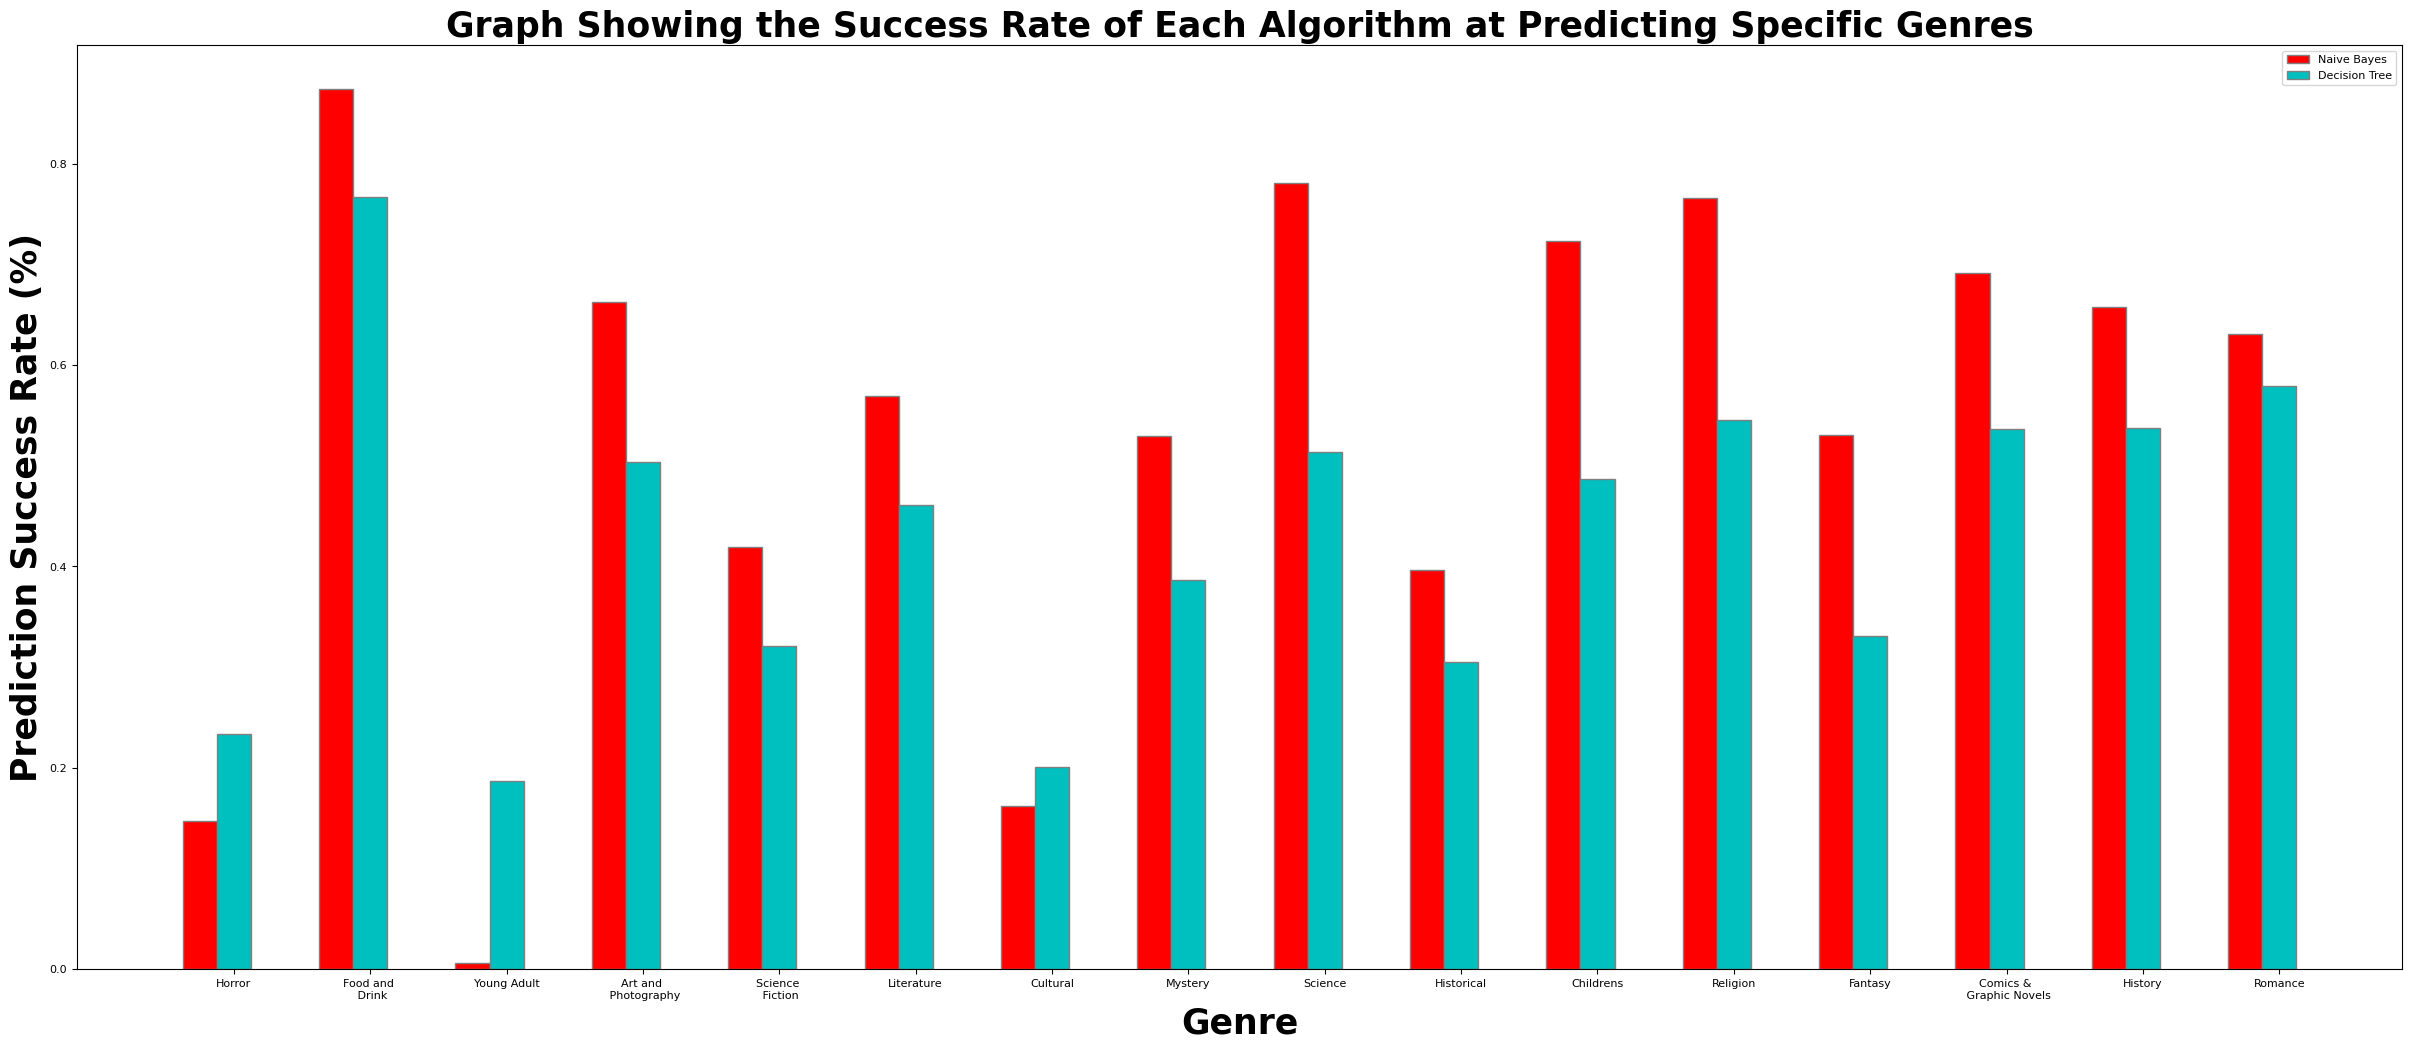

In [23]:
y1 = np.array([0.14715719, 0.8742515,  0.00651466, 0.66285714, 0.41935484, 0.56952381,
 0.16171617, 0.52948557, 0.78125,    0.39633448, 0.7231441,  0.76576056,
 0.53020833, 0.69205939, 0.65771393, 0.63076602])

y2 = np.array([0.23376623, 0.76679842, 0.18685121, 0.50422535, 0.32061069, 0.46085011,
 0.20106952, 0.3862194,  0.51390221, 0.3056,     0.48645076, 0.54575893,
 0.33087819, 0.53668548, 0.53764356, 0.57980858])

barWidth = 0.25
fig = plt.subplots(figsize =(30, 12))
 
br1 = np.arange(len(y1))
br2 = [x + barWidth for x in br1]
 
plt.bar(br1, y1, color ='r', width = barWidth,
        edgecolor ='grey', label ='Naive Bayes')
plt.bar(br2, y2, color ='c', width = barWidth,
        edgecolor ='grey', label ='Decision Tree')

plt.xlabel('Genre', fontweight ='bold', fontsize = 25)
plt.ylabel('Prediction Success Rate (%)', fontweight ='bold', fontsize = 25)
plt.xticks([r + barWidth for r in range(len(y1))],labeling2)
plt.title("Graph Showing the Success Rate of Each Algorithm at Predicting Specific Genres", fontsize=25,fontweight ='bold')

plt.legend()
plt.show()

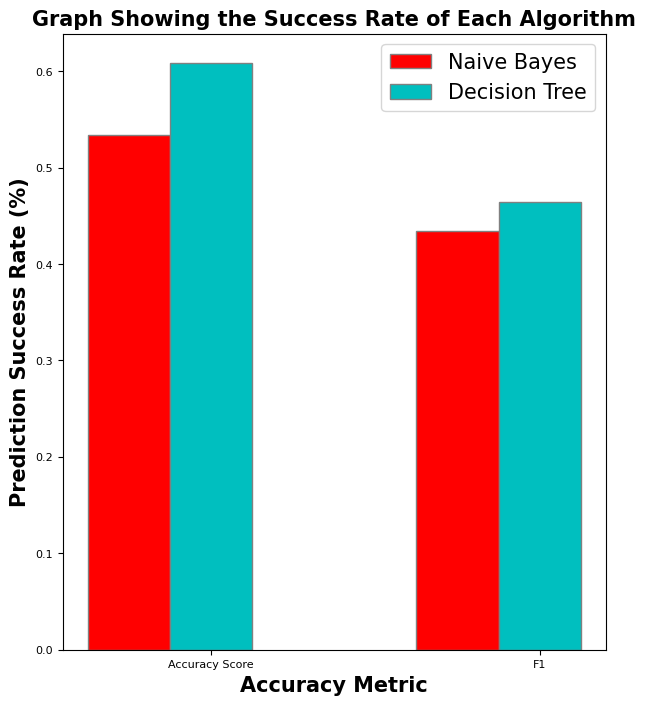

In [24]:
y1_ = np.array([0.5342561058107375, 0.4345371132721457])
y2_ = np.array([0.6083540908219965, 0.4640735773136616])
x1 = ["Accuracy Score","F1"]

barWidth_ = 0.25
fig_ = plt.subplots(figsize =(7, 8))
 
br1_ = np.arange(len(y1_))
br2_ = [x + barWidth_ for x in br1_]
 
plt.bar(br1_, y1_, color ='r', width = barWidth_,
        edgecolor ='grey', label ='Naive Bayes')
plt.bar(br2_, y2_, color ='c', width = barWidth_,
        edgecolor ='grey', label ='Decision Tree')

plt.xlabel('Accuracy Metric', fontweight ='bold', fontsize = 15)
plt.ylabel('Prediction Success Rate (%)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth_ for r in range(len(y1_))],x1)
plt.title("Graph Showing the Success Rate of Each Algorithm", fontsize =15, fontweight ='bold')

plt.rcParams.update({'font.size': 15})

plt.legend()
plt.show()

[0.6064003066015139, 0.6156941649899397, 0.6248922104052889, 0.6349525725783272, 0.646162690428284, 0.6568937434128581, 0.6701159336974226, 0.6819967423589154, 0.6938775510204082, 0.7056625467088243, 0.7041295391395995, 0.6918654785858005]
[0.5273548126361696, 0.5394173563383229, 0.5508472199246823, 0.5633686266999384, 0.5769914407366288, 0.5920813593242717, 0.6116666601246286, 0.6311121413475052, 0.6530648203792397, 0.6740829756861375, 0.6750460748909846, 0.6585372045160021]


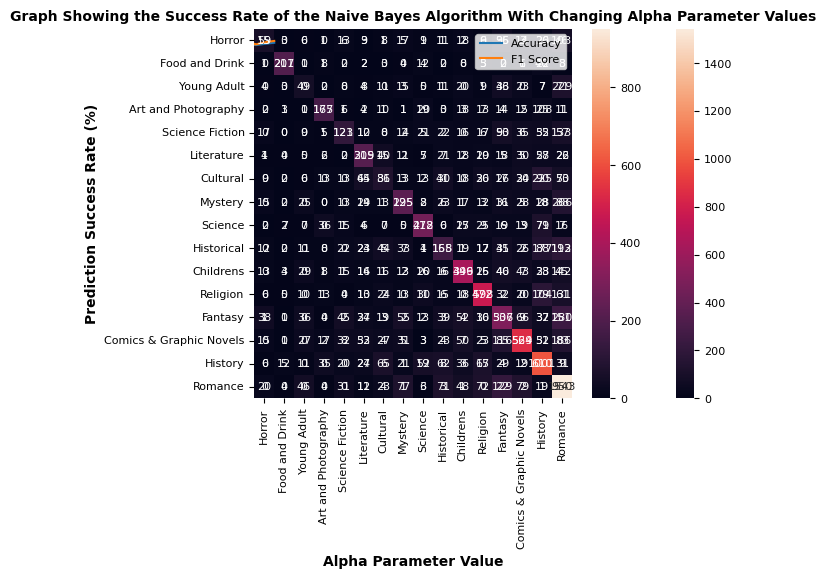

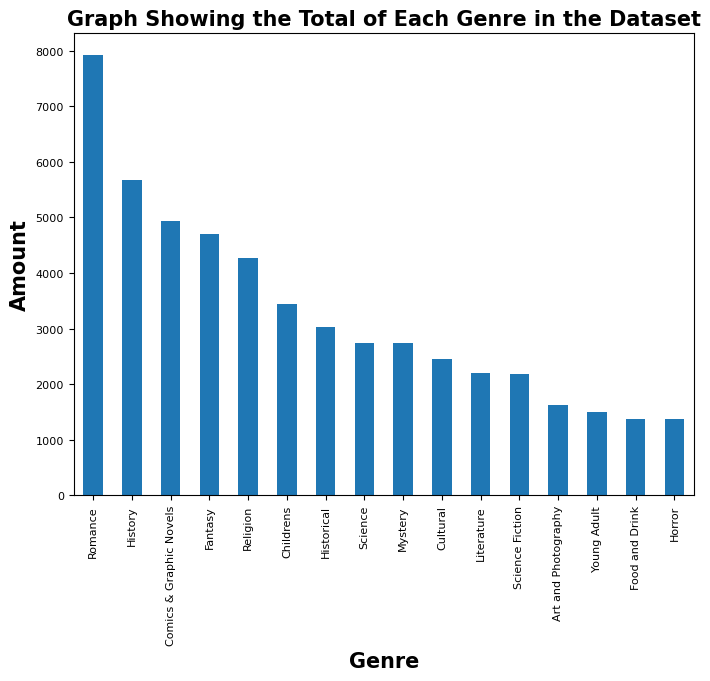

In [25]:
plt.rcParams.update({'font.size': 8})

cm = confusion_matrix(y_test, pred, labels=labeling)
df_cm = pd.DataFrame(cm, index=labeling, columns=labeling)
sns.heatmap(df_cm, annot=True, fmt='d')

cm = confusion_matrix(y_test, pred2, labels=labeling)
df_cm = pd.DataFrame(cm, index=labeling, columns=labeling)
sns.heatmap(df_cm, annot=True, fmt='d')

score = [1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.01,0.001]
rand = []
rand2 = []

for i in score:
    clf = MultinomialNB(alpha=i)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc = (metrics.accuracy_score(y_test, pred))
    f1 = (metrics.f1_score(y_test, pred,average="macro",))

    rand.append(acc)
    rand2.append(f1)
    
print(rand)
print(rand2)
plt.plot(score,rand, label="Accuracy")
plt.plot(score,rand2,label="F1 Score")
plt.xlabel('Alpha Parameter Value', fontweight ='bold', fontsize = 10)
plt.ylabel('Prediction Success Rate (%)', fontweight ='bold', fontsize = 10)
plt.title("Graph Showing the Success Rate of the Naive Bayes Algorithm With Changing Alpha Parameter Values", fontsize =10,fontweight ='bold')

plt.legend()
plt.show()
figure(figsize=(8,6))
df.genre.value_counts().plot(kind="bar")
plt.xlabel('Genre', fontweight ='bold', fontsize = 15)
plt.ylabel('Amount', fontweight ='bold', fontsize = 15)
plt.title('Graph Showing the Total of Each Genre in the Dataset', fontweight='bold', fontsize=15)
plt.rcParams.update({'font.size': 10})